In [1]:
import sys
sys.path.append("../") # go to parent dir

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
# from torchvision.models import resnet34

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
PATH = '/home/paperspace/kaggle/humpback/'

Let's first try to just produce a convolutional learner, by creating a new folder for the dataset with the proper train/test stuff.

In [44]:
# from planet import f2

metrics=[f1]
f_model = resnet34(num_classes=200)

In [46]:
# f_model

In [47]:
label_csv = f'{PATH}whale_sub_labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [48]:
len(val_idxs) / n

0.19917864476386038

In [49]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train_subset', label_csv, bs=8, tfms=tfms, val_idxs=val_idxs)
#                     suffix='.jpg', val_idxs=val_idxs)#, test_name='test-jpg')

In [50]:
sz = 512 # The size the images will be transformed, to make it run faster

data = get_data(sz)

In [51]:
data = data.resize(int(sz*1.3), 'tmp')

In [54]:
data.c

20

In [52]:
# learn = ConvLearner.pretrained(f_model, data, metrics=metrics, pretrained=True)
learn = ConvLearner.from_model_data(f_model, data)#, metrics=metrics)

In [53]:
learn.fit(0.02, 2)

  0%|          | 0/98 [00:00<?, ?it/s]


RuntimeError: size mismatch at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCTensorMathBlas.cu:247

In [41]:
### Run this with batch size of 8 or 16
lrf=learn.lr_find2()
learn.sched.plot()

  0%|          | 0/98 [00:00<?, ?it/s]


RuntimeError: size mismatch at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCTensorMathBlas.cu:247

In [45]:
learn.get_layer_groups()

[[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
  ReLU(inplace),
  MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False),
  Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

In [40]:
lr = 0.02

In [41]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

 84%|████████▎ | 82/98 [00:11<00:02,  7.40it/s, loss=3.99]

KeyboardInterrupt: 

In [50]:
lrs = np.array([lr/100,lr/10,lr])

In [51]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                        
    0      2.581971   1.444268   0.496721  
    1      1.878705   1.178229   0.554734                  
    2      1.22685    0.888053   0.722523                  
    3      1.244194   1.017252   0.626832                  
    4      0.853826   0.827457   0.777585                  
    5      0.624591   0.713742   0.806002                  
    6      0.540847   0.672835   0.834972                  


[array([0.67283]), 0.8349722365620112]

In [52]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                        
    0      0.614549   0.689203   0.806935  
    1      0.622797   0.775748   0.781169                  
    2      0.471155   0.66476    0.819312                  
    3      0.7305     0.821023   0.806877                  
    4      0.534834   0.627191   0.862806                  
    5      0.404633   0.622959   0.855237                  
    6      0.244604   0.620723   0.858246                  


[array([0.62072]), 0.8582458376870382]

In [53]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1                        
    0      0.316106   0.677333   0.841587  
    1      0.379357   0.727948   0.841817                  
    2      0.322998   0.644181   0.846078                  
    3      0.310452   0.740814   0.815987                  
    4      0.327104   0.720828   0.840056                  
    5      0.225332   0.626399   0.846601                  
    6      0.24042    0.644061   0.850857                  


[array([0.64406]), 0.8508574768034846]

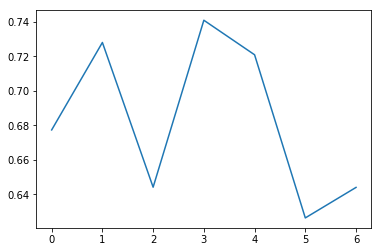

In [54]:
plt.plot(learn.sched.val_losses)